# Задание SQL

Работа ведётся с базой данных сервиса для чтения книг по подписке. Необходимо проанализировать базу данных с информацией о книгах, издательствах, авторах и пользовательских обзорах книг. Эти данные помогут сформулировать ценностное предложение для нового продукта.

**Задачи исследования** - произвести различные выгрузки данных сервиса вопросов и ответов с помощью SQL.

**Источник данных** - база данных, которая хранит информацию о книгах, издательствах, авторах и пользовательских обзорах книг.

**Навыки и инструменты** - SQL, обработка данных, выгрузка данных.

## Схема базы данных

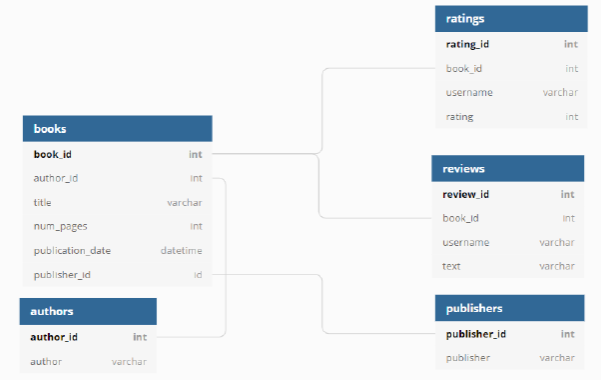

## Описание таблиц, содержащихся в базе данных

Таблица books. Содержит данные о книгах:
- `book_id` — идентификатор книги
- `author_id` — идентификатор автора
- `title` — название книги
- `num_pages` — количество страниц
- `publication_date` — дата публикации книги
- `publisher_id` — идентификатор издателя

Таблица authors. Содержит данные об авторах:
- `author_id` — идентификатор автора
- `author` — имя автора

Таблица publishers. Содержит данные об издательствах:
- `publisher_id` — идентификатор издательства
- `publisher` — название издательства

Таблица ratings. Содержит данные о пользовательских оценках книг:
- `rating_id` — идентификатор оценки
- `book_id` — идентификатор книги
- `username` — имя пользователя, оставившего оценку
- `rating` — оценка книги

Таблица reviews. Содержит данные о пользовательских обзорах на книги:
- `review_id` — идентификатор обзора
- `book_id` — идентификатор книги
- `username` — имя пользователя, написавшего обзор
- `text` — текст обзора

## Загрузка данных

### Используемые библиотеки и функции

In [1]:
# импортируем библиотеки
import pandas as pd
from sqlalchemy import text, create_engine
# устанавливаем параметры
db_config = {'user': 'user', # имя пользователя
             'pwd': 'pwd', # пароль
             'host': 'host',
             'port': port, # порт подключения
             'db': 'db'} # название базы данных
connection_string = 'postgresql://{user}:{pwd}@{host}:{port}/{db}'.format(**db_config)
# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'})

In [2]:
# функция выполнения SQL-запроса
def read_sql(query):
    return pd.io.sql.read_sql(query, con = engine)

###  Загрузка данных и основная информация

Посмотрим на основную информацию из таблице о книгах.

In [3]:
query = '''
           SELECT * 
           FROM books 
           LIMIT 5;
        '''
read_sql(query)

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


In [4]:
query = '''
           SELECT COUNT(*)
           FROM books;
        '''
read_sql(query)

,count
0,1000


В таблице с книгами содержится 6 столбцов и 1000 строк. 

Посмотрим на основную информацию о таблице с авторами книг.

In [5]:
query = '''
           SELECT * 
           FROM authors 
           LIMIT 5;
        '''
read_sql(query)

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


In [6]:
query = '''SELECT COUNT(*)
           FROM authors'''
con=engine.connect()
pd.io.sql.read_sql(sql=text(query), con = con)

,count
0,636


В таблице с авторами содержится 2 столбца и 636 строк. 

Посмотрим на основную информацию с издательствами книг.

In [7]:
query = '''
           SELECT * 
           FROM publishers
           LIMIT 5;
        '''
read_sql(query)

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


In [8]:
query = '''
           SELECT COUNT(*)
           FROM publishers;
        '''
read_sql(query)

,count
0,340


В таблице с издательствами содержится 2 столбца и 340 строк. 

Посмотрим на основную информацию по таблице с рейтингами книг.

In [9]:
query = '''
           SELECT * 
           FROM ratings
           LIMIT 5;
        '''
read_sql(query)

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


In [10]:
query = '''
           SELECT COUNT(*)
           FROM ratings;
        '''
read_sql(query)

,count
0,6456


В таблице с пользовательскими оценками книг 4 столбца и 6456 строк. 

Посмотрим на основную информацию с обзорами на книги.

In [11]:
query = '''
           SELECT * 
           FROM reviews
           LIMIT 5;
        '''
read_sql(query)

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


In [12]:
query = '''
           SELECT COUNT(*)
           FROM reviews;
        '''
read_sql(query)

,count
0,2793


В таблице с пользовательскими обзорами на книги содержится 4 столбца и 2793 строк.

## Задания

###  Задание 1

Посчитаем, сколько книг вышло после 1 января 2000 года

In [13]:
query = '''
           SELECT COUNT(*)
           FROM books
           WHERE DATE(publication_date) > '2000-01-01';
        '''
read_sql(query)

,count
0,819


После 1 января 2000 года вышло 819 книг. Всего в базе было 1000 книг, значит, довольно большое количество книг вышло после 1999 года.

###  Задание 2

Посчитаем для каждой книги количество обзоров и среднюю оценку.

In [14]:
query = '''
           WITH book_review AS (SELECT book_id,
                                       COUNT(review_id) AS total_review
                                FROM reviews
                                GROUP BY book_id),
                book_rating AS (SELECT book_id,
                                       ROUND(AVG(rating), 2) AS mean_rating
                                FROM ratings
                                GROUP BY book_id),
                book AS (SELECT book_id,
                                title
                         FROM books)                 
           SELECT b.book_id,
                  b.title,
                  re.total_review,
                  ra.mean_rating
           FROM book b
           LEFT OUTER JOIN book_review re ON b.book_id=re.book_id
           LEFT OUTER JOIN book_rating ra ON re.book_id=ra.book_id;
        '''
read_sql(query)

,book_id,title,total_review,mean_rating
0,1,'Salem's Lot,2.0,3.67
1,2,1 000 Places to See Before You Die,1.0,2.50
2,3,13 Little Blue Envelopes (Little Blue Envelope...,3.0,4.67
3,4,1491: New Revelations of the Americas Before C...,2.0,4.50
4,5,1776,4.0,4.00
...,...,...,...,...
995,996,Wyrd Sisters (Discworld #6; Witches #2),3.0,3.67
996,997,Xenocide (Ender's Saga #3),3.0,3.40
997,998,Year of Wonders,4.0,3.20
998,999,You Suck (A Love Story #2),2.0,4.50


Для каждой книги были подсчитаны количество обзоров и средняя оценка. Не на все книги в базе пользователи ставили оценки и делали обзоры.

###  Задание 3

Определим издательство, которое выпустило наибольшее число книг толще 50 страниц.

In [15]:
query = '''
           WITH right_publish AS (SELECT publisher_id,
                                         COUNT(book_id) AS total_book
                                  FROM books
                                  WHERE num_pages > 50
                                  GROUP BY publisher_id )
           SELECT p.publisher 
           FROM right_publish rp
           LEFT OUTER JOIN publishers p ON rp.publisher_id=p.publisher_id
           ORDER BY rp.total_book DESC
           LIMIT 1;
        '''
read_sql(query)

,publisher
0,Penguin Books


Издательство Penguin Books выпустила наибольшее количество книг толще 50 страниц. Значит, это популярное издательство, которое выпускает много изданий.

###  Задание 4

Определим автора с самой высокой средней оценкой книг, при этом учёту подлежат только книги с 50 и более оценками.

In [16]:
query = '''
           WITH book_rating AS (SELECT book_id,
                                       COUNT(rating) AS total_rating,
                                       ROUND(AVG(rating), 2) AS mean_rating
                                FROM ratings
                                GROUP BY book_id
                                HAVING COUNT(rating) >= 50)
           SELECT author
           FROM book_rating br
           LEFT OUTER JOIN books b ON b.book_id=br.book_id
           LEFT OUTER JOIN authors a ON a.author_id=b.author_id
           GROUP BY a.author_id
           ORDER BY AVG(br.mean_rating) DESC
           LIMIT 1;
        '''
read_sql(query)

,author
0,J.K. Rowling/Mary GrandPré


Автором, у которого самая высокая средняя оценка за книги, является Д.К.Роулинг, что неудивительно, так как её серия книг про Гарри Поттера известна на весь мир.

###  Задание 5

Посчитаем среднее количество обзоров от пользователей, которые поставили больше 48 оценок.

In [17]:
query = '''
           WITH user_score AS (SELECT username, COUNT(review_id) AS total_review
                               FROM reviews
                               WHERE username IN (SELECT username
                                                  FROM ratings
                                                  GROUP BY username
                                                  HAVING COUNT(rating_id) > 48)
                               GROUP BY username)
           SELECT AVG(total_review)
           FROM user_score;
        '''
read_sql(query)

,avg
0,24.0


Среднее количество обзоров от пользователей, которые поставили больше 48 оценок равняется 24 обзорам.

## Выводы:

- После 1 января 2000 года вышло 819 книг
- Издательство Penguin Books выпустила наибольшее количество книг толще 50 страниц
- Автором, у которого самая высокая средняя оценка за книги, является Д.К.Роулинг
- Среднее количество обзоров от пользователей, которые поставили больше 48 оценок равняется 24 обзорам